In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [77]:
data = pd.read_csv('data/indexes/Clean dfs/ibex.csv', parse_dates=['Date'])

In [78]:
data.head()

,Date,Last,Open,Max,Min,Vol_K,Var_%,Index
0,2019-10-23,9358.5,9347.5,9380.0,9334.0,NaN,-0.23,IBEX_10years
1,2019-10-22,9380.2,9393.3,9417.4,9344.6,139000.50,-0.24,IBEX_10years
2,2019-10-21,9402.3,9350.3,9424.3,9342.1,167000.99,0.78,IBEX_10years
3,2019-10-18,9329.8,9310.3,9362.2,9307.6,150000.24,-0.11,IBEX_10years
4,2019-10-17,9340.0,9360.9,9494.5,9340.0,195000.29,-0.50,IBEX_10years


In [81]:
type(data['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 8 columns):
Date     2580 non-null datetime64[ns]
Last     2580 non-null float64
Open     2580 non-null float64
Max      2580 non-null float64
Min      2580 non-null float64
Vol_K    2414 non-null float64
Var_%    2580 non-null float64
Index    2580 non-null object
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 161.4+ KB


In [96]:
data['Datetime'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
indexDS = data.set_index(['Datetime'])

In [83]:
data.index = data.Date

In [97]:
indexDS.head()

,Date,Last,Open,Max,Min,Vol_K,Var_%,Index
Datetime,,,,,,,,
2019-10-23,2019-10-23,9358.5,9347.5,9380.0,9334.0,NaN,-0.23,IBEX_10years
2019-10-22,2019-10-22,9380.2,9393.3,9417.4,9344.6,139000.50,-0.24,IBEX_10years
2019-10-21,2019-10-21,9402.3,9350.3,9424.3,9342.1,167000.99,0.78,IBEX_10years
2019-10-18,2019-10-18,9329.8,9310.3,9362.2,9307.6,150000.24,-0.11,IBEX_10years
2019-10-17,2019-10-17,9340.0,9360.9,9494.5,9340.0,195000.29,-0.50,IBEX_10years


In [53]:
data.head()

,Date,Last,Open,Max,Min,Vol_K,Var_%,Index
Date,,,,,,,,
2019-10-23,2019-10-23,9358.5,9347.5,9380.0,9334.0,NaN,-0.23,IBEX_10years
2019-10-22,2019-10-22,9380.2,9393.3,9417.4,9344.6,139000.50,-0.24,IBEX_10years
2019-10-21,2019-10-21,9402.3,9350.3,9424.3,9342.1,167000.99,0.78,IBEX_10years
2019-10-18,2019-10-18,9329.8,9310.3,9362.2,9307.6,150000.24,-0.11,IBEX_10years
2019-10-17,2019-10-17,9340.0,9360.9,9494.5,9340.0,195000.29,-0.50,IBEX_10years


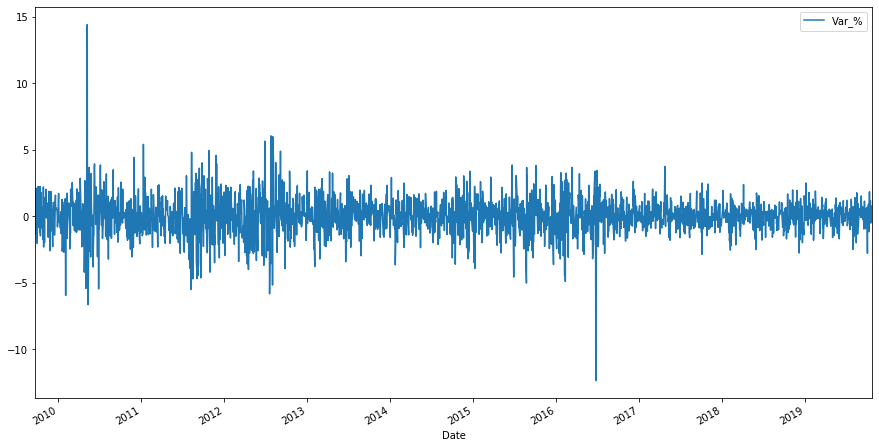

In [86]:
ts.plot(figsize=(15,8))
plt.show()

In [87]:
ts2 = data[['Last']]
ts2.head()

,Last
Date,
2019-10-23,9358.5
2019-10-22,9380.2
2019-10-21,9402.3
2019-10-18,9329.8
2019-10-17,9340.0


In [98]:
timeseries = indexDS[['Last']]
timeseries.head()

,Last
Datetime,
2019-10-23,9358.5
2019-10-22,9380.2
2019-10-21,9402.3
2019-10-18,9329.8
2019-10-17,9340.0


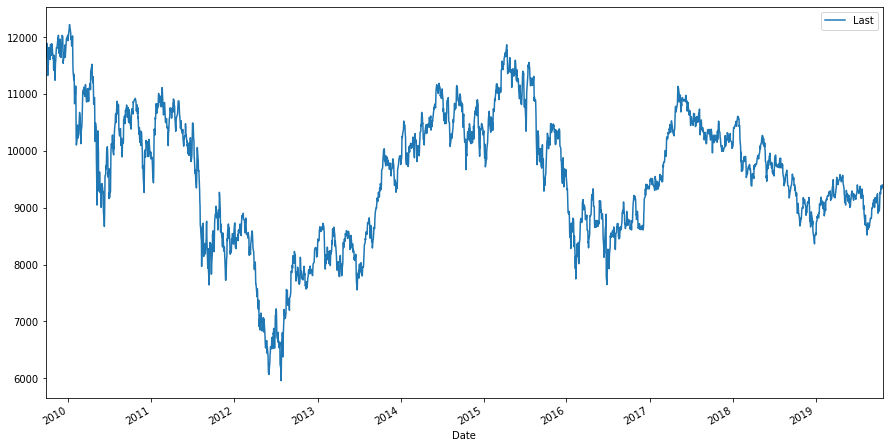

In [88]:
ts2.plot(figsize=(15,8))
plt.show()

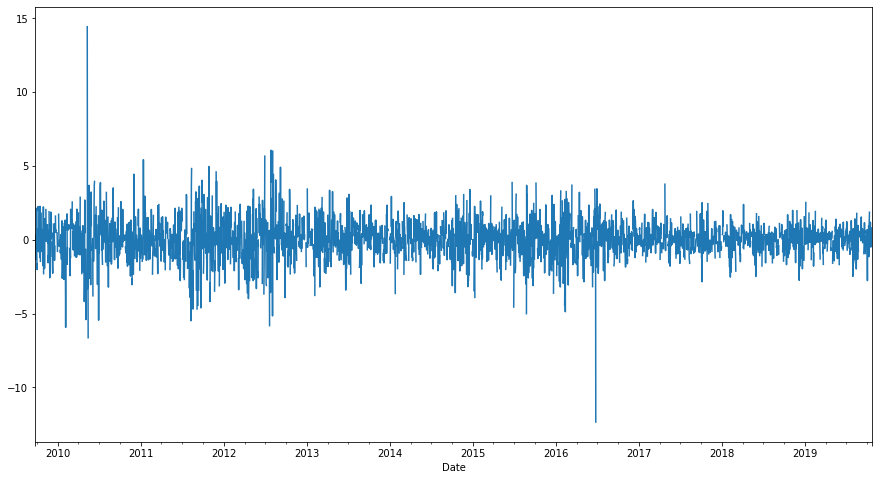

In [89]:
resampled_var = data['Var_%'].resample('D').mean()

resampled_var.plot(figsize=(15,8))
plt.show()

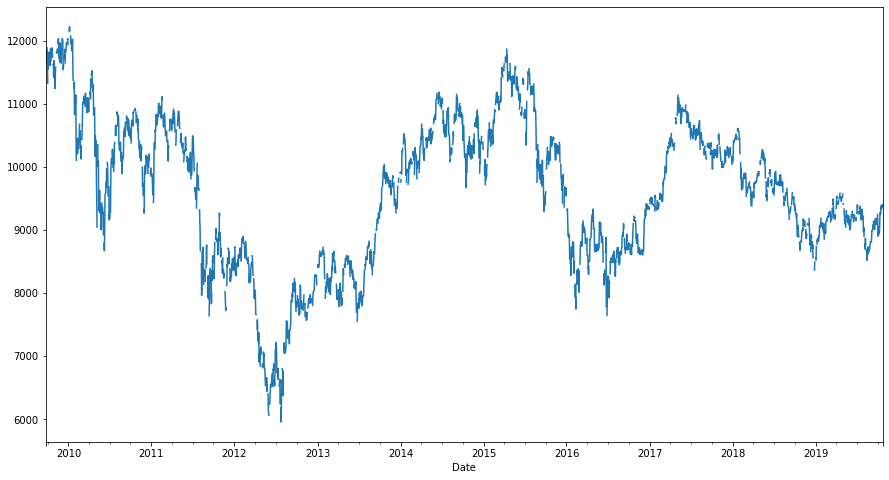

In [90]:
resampled_last = data['Last'].resample('D').mean()

resampled_last.plot(figsize=(15,8))
plt.show()

In [99]:
import statsmodels.api as sm

res_last = resampled_last.dropna()

dec = sm.tsa.seasonal_decompose(timeseries, model='additive')

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

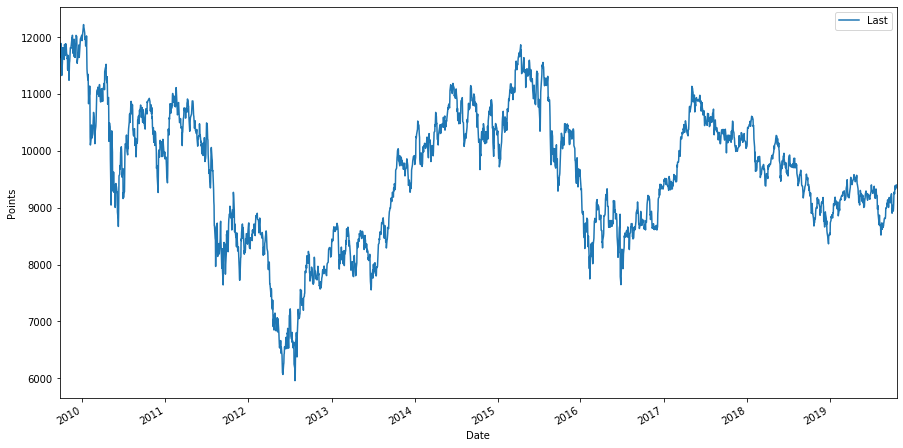

In [105]:
timeseries.plot(figsize=(15,8))
plt.xlabel('Date')
plt.ylabel('Points')
plt.show()

In [116]:
rolmean = timeseries.rolling(window=200).mean()

rolstd = timeseries.rolling(window=200).std()

print(rolmean, rolstd)

                  Last
Datetime              
2019-10-23         NaN
2019-10-22         NaN
2019-10-21         NaN
2019-10-18         NaN
2019-10-17         NaN
...                ...
2009-09-29  10882.0300
2009-09-28  10890.1885
2009-09-25  10898.1165
2009-09-24  10905.9595
2009-09-23  10914.8235

[2580 rows x 1 columns]                   Last
Datetime              
2019-10-23         NaN
2019-10-22         NaN
2019-10-21         NaN
2019-10-18         NaN
2019-10-17         NaN
...                ...
2009-09-29  957.298878
2009-09-28  958.918401
2009-09-25  958.559771
2009-09-24  958.638398
2009-09-23  959.163383

[2580 rows x 1 columns]


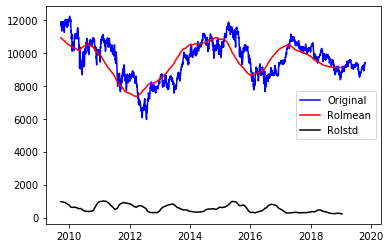

In [117]:
original = plt.plot(timeseries, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolmean')
std = plt.plot(rolstd, color='black', label='Rolstd')
plt.legend(loc='best')
plt.show()

In [127]:
# Check if data is stationary

from statsmodels.tsa.stattools import adfuller

print('Dickey-Fuller test:\n-------------------')
dftest = adfuller(timeseries['Last'], autolag='AIC')
dfprint = pd.Series(dftest[0:4], index=['Test statistic', 'p-value', 'lag used', 'observations used'])
for key, value in dftest[4].items():
    dfprint['Critical value (%s)' %key] = value
    
print(dfprint)

#p-value > 0.05, we cannot reject H0 --> data is not stationary

Dickey-Fuller test:
-------------------
Test statistic            -2.033504
p-value                    0.272079
lag used                  13.000000
observations used       2566.000000
Critical value (1%)       -3.432901
Critical value (5%)       -2.862667
Critical value (10%)      -2.567370
dtype: float64


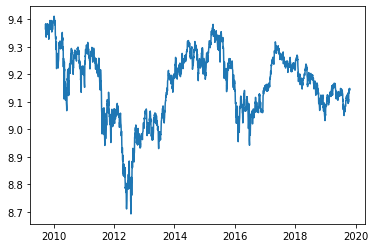

In [129]:
# Estimate trend

timeseries_log = np.log(timeseries)
plt.plot(timeseries_log)

In [131]:
rolmean_log = timeseries_log.rolling(window=200).mean()

rolstd_log = timeseries_log.rolling(window=200).std()

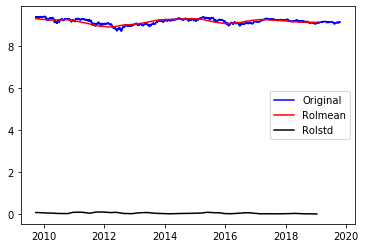

In [132]:
original = plt.plot(timeseries_log, color='blue', label='Original')
mean = plt.plot(rolmean_log, color='red', label='Rolmean')
std = plt.plot(rolstd_log, color='black', label='Rolstd')
plt.legend(loc='best')
plt.show()

In [133]:
# Check if logaritmic data is stationary

from statsmodels.tsa.stattools import adfuller

print('Dickey-Fuller test:\n-------------------')
dftest = adfuller(timeseries_log['Last'], autolag='AIC')
dfprint = pd.Series(dftest[0:4], index=['Test statistic', 'p-value', 'lag used', 'observations used'])
for key, value in dftest[4].items():
    dfprint['Critical value (%s)' %key] = value
    
print(dfprint)

#p-value > 0.05, we cannot reject H0 --> data is not stationary

Dickey-Fuller test:
-------------------
Test statistic            -2.130800
p-value                    0.232312
lag used                  13.000000
observations used       2566.000000
Critical value (1%)       -3.432901
Critical value (5%)       -2.862667
Critical value (10%)      -2.567370
dtype: float64


In [135]:
logminusmovingavg = timeseries_log- rolmean_log
logminusmovingavg.tail(25)

,Last
Datetime,
2009-10-27,0.082092
2009-10-26,0.080707
2009-10-23,0.090329
2009-10-22,0.097340
2009-10-21,0.100816
2009-10-20,0.093214
2009-10-19,0.100802
2009-10-16,0.082695
2009-10-15,0.096823


In [137]:
logminusmovingavg.dropna(inplace=True)

In [139]:
# Check if logaritmic data is stationary

from statsmodels.tsa.stattools import adfuller

print('Dickey-Fuller test:\n-------------------')
dftest = adfuller(logminusmovingavg['Last'], autolag='AIC')
dfprint = pd.Series(dftest[0:4], index=['Test statistic', 'p-value', 'lag used', 'observations used'])
for key, value in dftest[4].items():
    dfprint['Critical value (%s)' %key] = value
    
print(dfprint)

#p-value < 0.05, we reject H0 --> data is now stationary

Dickey-Fuller test:
-------------------
Test statistic            -3.450497
p-value                    0.009353
lag used                  13.000000
observations used       2367.000000
Critical value (1%)       -3.433116
Critical value (5%)       -2.862762
Critical value (10%)      -2.567420
dtype: float64


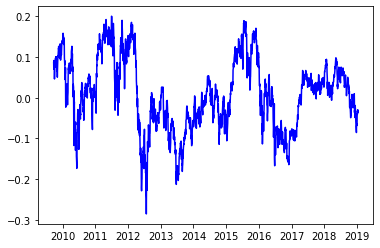

In [140]:
plt.plot(logminusmovingavg, color='blue', label='Original')
plt.show()